### Stock Market Prediction And Forecasting Using Stacked LSTM

In [75]:
### Keras and Tensorflow >2.0

In [76]:
import pandas as pd

In [77]:
df=pd.read_csv('Bitcoin.csv')

In [78]:
df.head()

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,1705881600000,2024-01-22 0:00:00,BTC/USD,41670.0,41755.0,41558.0,41648.0,1.683399e+06,40.419677
1,1705795200000,2024-01-21 0:00:00,BTC/USD,41777.0,41946.0,41588.0,41679.0,5.160147e+07,1238.068874
2,1705708800000,2024-01-20 0:00:00,BTC/USD,41727.0,41944.0,41518.0,41778.0,6.312295e+07,1510.913615
3,1705622400000,2024-01-19 0:00:00,BTC/USD,41358.0,42212.0,40358.0,41715.0,6.467284e+07,1550.349733
4,1705536000000,2024-01-18 0:00:00,BTC/USD,42784.0,42932.0,40704.0,41337.0,5.716018e+07,1382.784976


In [79]:
df.tail()

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
3265,1423785600,2015-02-13 0:00:00,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11
3266,1423699200,2015-02-12 0:00:00,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65
3267,1423612800,2015-02-11 0:00:00,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28
3268,1423526400,2015-02-10 0:00:00,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95
3269,1423440000,2015-02-09 0:00:00,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03


In [80]:
df1=df.reset_index()['close']

In [81]:
df1

0       41648.00
1       41679.00
2       41778.00
3       41715.00
4       41337.00
          ...   
3265      236.00
3266      222.60
3267      219.19
3268      220.96
3269      220.61
Name: close, Length: 3270, dtype: float64

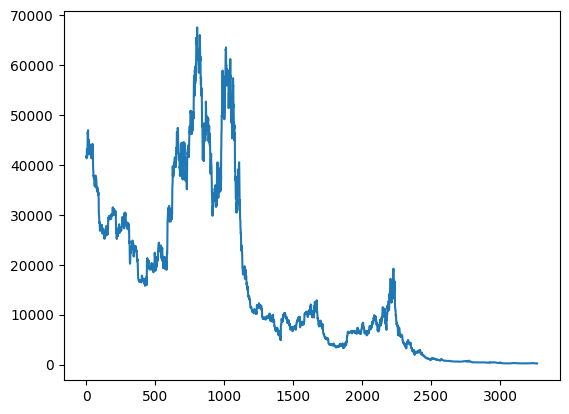

In [82]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [83]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [84]:
import numpy as np

In [85]:
df1

0       41648.00
1       41679.00
2       41778.00
3       41715.00
4       41337.00
          ...   
3265      236.00
3266      222.60
3267      219.19
3268      220.96
3269      220.61
Name: close, Length: 3270, dtype: float64

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [87]:
print(df1)

[[6.15559286e-01]
 [6.16019819e-01]
 [6.17490552e-01]
 ...
 [9.74546364e-05]
 [1.23749561e-04]
 [1.18550000e-04]]


In [88]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [89]:
training_size,test_size

(2125, 1145)

In [90]:
train_data

array([[0.61555929],
       [0.61601982],
       [0.61749055],
       ...,
       [0.09810785],
       [0.09972417],
       [0.09846142]])

In [91]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [92]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [93]:
print(X_train.shape), print(y_train.shape)

(2024, 100)
(2024,)


(None, None)

In [94]:
print(X_test.shape), print(ytest.shape)

(1044, 100)
(1044,)


(None, None)

In [95]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [107]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model

In [108]:
### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [109]:
from keras.layers import Input, Dense
from keras.models import Model

In [110]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [111]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
32/32 [==============================] - 30s 498ms/step - loss: 0.0252 - val_loss: 7.3569e-04
Epoch 2/100
32/32 [==============================] - 13s 402ms/step - loss: 0.0022 - val_loss: 3.1304e-04
Epoch 3/100
32/32 [==============================] - 13s 422ms/step - loss: 0.0018 - val_loss: 2.2916e-04
Epoch 4/100
32/32 [==============================] - 13s 397ms/step - loss: 0.0016 - val_loss: 2.1947e-04
Epoch 5/100
32/32 [==============================] - 12s 365ms/step - loss: 0.0015 - val_loss: 1.4574e-04
Epoch 6/100
32/32 [==============================] - 13s 414ms/step - loss: 0.0014 - val_loss: 8.6518e-05
Epoch 7/100
32/32 [==============================] - 12s 383ms/step - loss: 0.0013 - val_loss: 1.2461e-04
Epoch 8/100
32/32 [==============================] - 13s 419ms/step - loss: 0.0014 - val_loss: 9.2256e-05
Epoch 9/100
32/32 [==============================] - 12s 390ms/step - loss: 0.0012 - val_loss: 2.1199e-04
Epoch 10/100
32/32 [==========================

In [112]:
tf.__version__

'2.13.0'

In [113]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

33/33 [==============================] - 3s 92ms/step


In [114]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [115]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

26660.90151902145

In [116]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3049.1231823202675

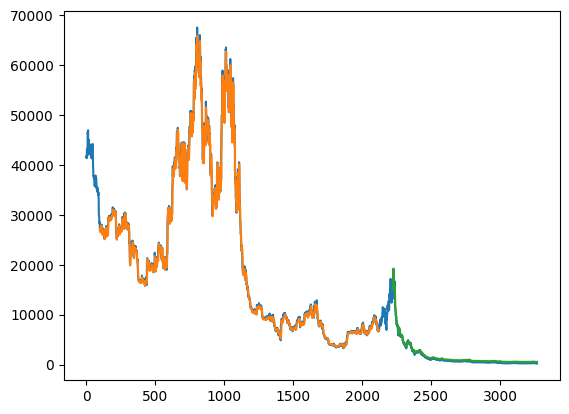

In [117]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [149]:
len(test_data)

1145

In [119]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 804)

In [120]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [121]:
temp_input

[0.016843162064237763,
 0.016556443393043612,
 0.01628012384463889,
 0.015567041139078315,
 0.01563983499860429,
 0.015262495400245154,
 0.014846530488668151,
 0.014568725351293513,
 0.014769279862232424,
 0.014475133246188685,
 0.015075311190035506,
 0.015197129485568766,
 0.014969834373171335,
 0.014904468458494951,
 0.014491474724857782,
 0.0146177497873008,
 0.01454198474983499,
 0.013782848786206964,
 0.013863070590582525,
 0.013926950916288993,
 0.013294090015103985,
 0.013086107559315486,
 0.01290783688292534,
 0.012309144528048443,
 0.012318058061867948,
 0.012361140141995568,
 0.012331428362597211,
 0.011235063702797827,
 0.01128364246211414,
 0.010837371535550814,
 0.012182869465605425,
 0.012277947159680166,
 0.013418879488577087,
 0.012298745405259017,
 0.01194220405247873,
 0.01127368901601569,
 0.01274293650726446,
 0.014201784875723798,
 0.01550167522440193,
 0.015336774848741047,
 0.015240211565696386,
 0.015030743520937969,
 0.01425823725658068,
 0.013411451543727498,


In [133]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=803
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [1.65564434e-02 1.62801238e-02 1.55670411e-02 1.56398350e-02
 1.52624954e-02 1.48465305e-02 1.45687254e-02 1.47692799e-02
 1.44751332e-02 1.50753112e-02 1.51971295e-02 1.49698344e-02
 1.49044685e-02 1.44914747e-02 1.46177498e-02 1.45419847e-02
 1.37828488e-02 1.38630706e-02 1.39269509e-02 1.32940900e-02
 1.30861076e-02 1.29078369e-02 1.23091445e-02 1.23180581e-02
 1.23611401e-02 1.23314284e-02 1.12350637e-02 1.12836425e-02
 1.08373715e-02 1.21828695e-02 1.22779472e-02 1.34188795e-02
 1.22987454e-02 1.19422041e-02 1.12736890e-02 1.27429365e-02
 1.42017849e-02 1.55016752e-02 1.53367748e-02 1.52402116e-02
 1.50307435e-02 1.42582373e-02 1.34114515e-02 1.45256433e-02
 1.39254653e-02 1.51495906e-02 1.58448463e-02 1.58329616e-02
 1.56754891e-02 1.59934052e-02 1.55299014e-02 1.51614754e-02
 1.45063306e-02 1.46014083e-02 1.43458870e-02 1.39700330e-02
 1.44513638e-02 1.45167297e-02 1.35614960e-02 1.36224052e-02
 1.30519390e-02 1.25319829e-02 1.25854641e-02 1.25319829e-02
 1.22690336e

In [166]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [167]:
import matplotlib.pyplot as plt

In [168]:
len(df1)

3270

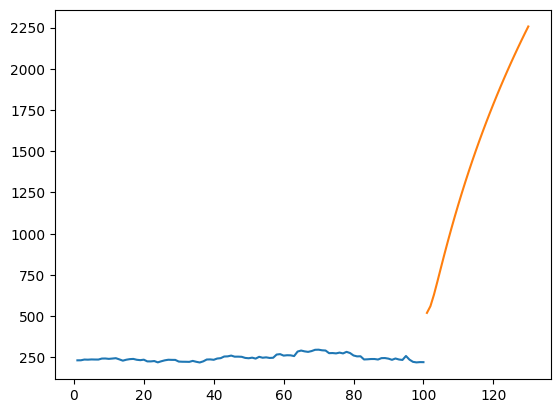

In [169]:
plt.plot(day_new,scaler.inverse_transform(df1[3170:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

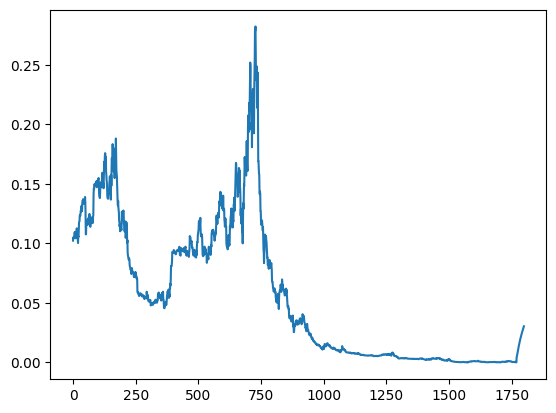

In [163]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

In [164]:
df3=scaler.inverse_transform(df3).tolist()

In [170]:
print(df3)

[[41648.0], [41678.99999999999], [41778.0], [41715.0], [41337.0], [42778.0], [43163.0], [42520.0], [41731.0], [42847.0], [42809.0], [46333.0], [46653.0], [46113.0], [46946.0], [43959.0], [44018.0], [44191.0], [44224.0], [42869.0], [44994.0], [44175.0], [42326.0], [42199.0], [42139.0], [42617.0], [43479.0], [42568.0], [43641.00000000001], [43043.0], [43800.99999999999], [44038.0], [43890.0], [43689.0], [42316.0], [42672.0], [41411.0], [42328.0], [41974.0], [43064.0], [42891.0], [41501.0], [41287.0], [43809.0], [43749.0], [44173.0], [43290.0], [43814.0], [44112.0], [41942.0], [39940.0], [39438.0], [38676.0], [37724.0], [37834.0], [37815.0], [37263.0], [37443.0], [37781.0], [37704.0], [37280.0], [37407.0], [35755.0], [37451.0], [37369.0], [36581.0], [36631.0], [36161.0], [37865.0], [35542.0], [36503.0], [37046.0], [37141.0], [37301.0], [36699.0], [35629.0], [35455.0], [35053.0], [35074.0], [35103.0], [34751.0], [34944.0], [35447.0], [34669.0], [34490.0], [34552.0], [34104.0], [33933.0], [

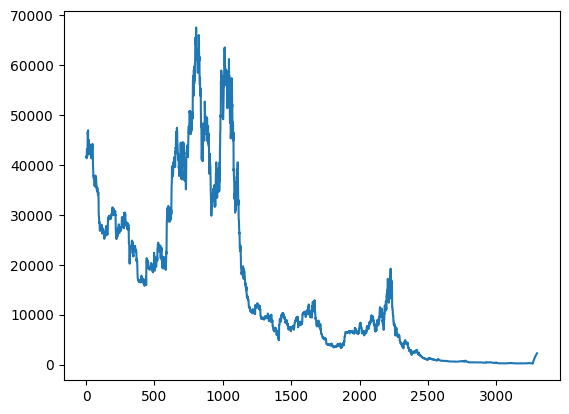

In [165]:
plt.plot(df3)

In [171]:
import pickle

In [172]:
pickle.dump(df3,open('bitcoin.pkl','wb'))